# Problem-4_Factor analysis with student stress data

In [1]:
# Student Stress Factors Analysis + Factor Analysis
# pip install pandas numpy matplotlib seaborn factor-analyzer
# Step-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

In [2]:
#  Load dataset
df = df= pd.read_csv('H:/ACADEMIC TASKS/5th Year/1st year 1st sem/STAT 5101_Advanced Multivariate Techniques_SiD/Assignment/StressLevelDataset.csv')

In [3]:
#Basic info
print(df.info())
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [4]:
#Step-2
#Comparative Analysis
corr_vars = ['anxiety_level', 'academic_performance', 'sleep_quality', 'depression', 'bullying', 'mental_health_history']
corr_df = df[corr_vars]
print("\nCorrelation Matrix:\n", corr_df.corr())


Correlation Matrix:
                        anxiety_level  academic_performance  sleep_quality  \
anxiety_level               1.000000             -0.649601      -0.710292   
academic_performance       -0.649601              1.000000       0.671326   
sleep_quality              -0.710292              0.671326       1.000000   
depression                  0.694340             -0.633174      -0.693161   
bullying                    0.709982             -0.666229      -0.699427   
mental_health_history       0.634450             -0.586193      -0.614146   

                       depression  bullying  mental_health_history  
anxiety_level            0.694340  0.709982               0.634450  
academic_performance    -0.633174 -0.666229              -0.586193  
sleep_quality           -0.693161 -0.699427              -0.614146  
depression               1.000000  0.665790               0.615882  
bullying                 0.665790  1.000000               0.624366  
mental_health_history   

In [5]:
#Step-3
# Factor Analysis Preparation
fa_cols = [c for c in df.columns if c != 'stress_level']  # exclude target
X = df[fa_cols]

In [6]:
## # Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
## Suitability tests
kmo_all, kmo_model = calculate_kmo(X)
chi_square_value, bartlett_p = calculate_bartlett_sphericity(X)
print(f"\nKMO: {kmo_model:.3f}   Bartlett p-value: {bartlett_p:.5f}")


KMO: 0.968   Bartlett p-value: 0.00000


1. KMO (Kaiser–Meyer–Olkin Measure)
Purpose: Checks if the variables share enough common variance for factor analysis.
Rule of thumb: KMO ≥ 0.60 → Proceed with factor analysis.
KMO ≥ 0.80 → Very good; KMO ≥ 0.90 → Excellent.

In this  dataset is highly suitable for factor analysis because KMO= 0.968

2. Bartlett’s Test of Sphericity
Purpose: Tests whether the correlation matrix is significantly different from an identity matrix (where variables are unrelated).

Null hypothesis (H₀): Variables are not correlated (identity matrix).

Decision rule:

p-value < 0.05 → Reject H₀ → Correlations exist → Factor analysis is justified.

p-value ≥ 0.05 → Fail to reject H₀ → Data may not be suitable.

Since, p value is 0.00000 here so data is suitable for factor analysis

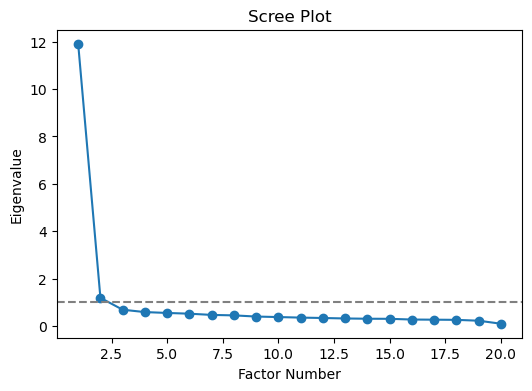


Eigenvalues:
 [11.91137666  1.19614612  0.69328345  0.59383199  0.55741186  0.52584496
  0.47413369  0.45466259  0.40556274  0.38374015  0.3610752   0.34419362
  0.32451427  0.31313165  0.3096958   0.27948105  0.27321819  0.26607804
  0.22979861  0.10281937]


In [9]:
#Step-4
#  Scree plot
fa_test = FactorAnalyzer(rotation=None)
fa_test.fit(X)
ev, v = fa_test.get_eigenvalues()

plt.figure(figsize=(6,4))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.axhline(1, linestyle='--', color='grey')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.show()

print("\nEigenvalues:\n", ev)

Since Scree plot elbow = 2, and First two eigenvalues > 1

Then n_factors = 2 is the correct choice

In [10]:
#Step-5
#Factor Analysis with chosen number of factors
n_factors = 2  # based 2 domains
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(X)

loadings = pd.DataFrame(fa.loadings_, index=fa_cols, columns=[f'Factor{i+1}' for i in range(n_factors)])
print("\nFactor Loadings:\n", loadings.round(3))

variance = fa.get_factor_variance()
var_df = pd.DataFrame({
    'SS Loadings': variance[0],
    'Proportion Var': variance[1],
    'Cumulative Var': variance[2]
}, index=[f'Factor{i+1}' for i in range(n_factors)])
print("\nVariance explained:\n", var_df)

# Factor scores
scores = pd.DataFrame(fa.transform(X), columns=[f'Factor{i+1}' for i in range(n_factors)])
print("\nFactor Scores sample:\n", scores.head())


Factor Loadings:
                               Factor1  Factor2
anxiety_level                   0.811    0.231
self_esteem                    -0.712   -0.437
mental_health_history           0.718    0.203
depression                      0.751    0.350
headache                        0.724    0.284
blood_pressure                  0.121    0.993
sleep_quality                  -0.806   -0.205
breathing_problem               0.661    0.073
noise_level                     0.650    0.263
living_conditions              -0.637   -0.200
safety                         -0.748   -0.231
basic_needs                    -0.745   -0.214
academic_performance           -0.767   -0.192
study_load                      0.631    0.266
teacher_student_relationship   -0.748   -0.300
future_career_concerns          0.779    0.333
social_support                 -0.515   -0.687
peer_pressure                   0.712    0.283
extracurricular_activities      0.693    0.323
bullying                        0.794    

Interpretation:
1- Variance explained

Factor 1: Explains 49.24% of the variance.
Factor 2: Explains 13.80% of the variance.

Total explained variance: 63.05% — pretty good for social science data (anything above ~60% is considered strong).

This means that these two factors together explain about 63% of the patterns in your dataset.

2- Factor interpretation (based on loadings)
Factor loadings tell us how strongly each variable is linked to a factor.
A loading above ±0.5 is usually considered meaningful.
Positive = direct relationship,
Negative = inverse relationship.

**Factor 1 – "Psychological & Social Stress"**
High positive loadings:

anxiety_level (0.81)

depression (0.75)

mental_health_history (0.72)

headache (0.72)

future_career_concerns (0.78)

bullying (0.79)

peer_pressure (0.71)

extracurricular_activities (0.69)

High negative loadings:

self_esteem (-0.71)

sleep_quality (-0.81)

safety (-0.75)

basic_needs (-0.75)

academic_performance (-0.77)

teacher_student_relationship (-0.75)

* Interpretation:
This factor seems to represent a general mental & emotional well-being dimension, where:
Higher anxiety, depression, bullying, peer pressure increase the score.
Higher self-esteem, safety, academic performance decrease the score.

**Factor 2 – "Physical Health & Social Support"**

High positive loadings:

blood_pressure (0.99) — very strong!

depression (0.35)

future_career_concerns (0.33)

extracurricular_activities (0.32)

High negative loadings:

self_esteem (-0.44)

social_support (-0.69) — strong negative link!

sleep_quality (-0.20, small)

* Interpretation:
This factor seems to capture physical health & perceived support:

Higher blood pressure, moderate depression link to higher scores.

Strong social support is linked to lower scores.



3- Factor scores
The Factor Scores sample shows each participant's score on these two latent factors.

Positive score = above-average tendency for that factor.

Negative score = below-average tendency.

For example:

Participant 0: Factor1 = 0.57 (slightly higher psychological stress), Factor2 = -1.70 (much lower physical health/social support issues).

Participant 1: Factor1 = 1.05 (high stress), Factor2 = 0.84 (also higher physical health issues).